# Lecture 5: Supervised Models, [Regression Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* How to train a regression tree with `sklearn`.

## Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Data

For the regression trees, we again use the sine data we used last lecture for linear regressions:

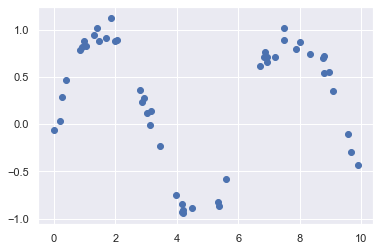

In [2]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
y = np.sin(X) + 0.1 * rng.randn(50)

plt.scatter(X, y);

## Regression Trees

### Steps 1-4
We follow the `sklearn` training process as seen on the slides.

In [3]:
from sklearn import tree

# choose model & hyperparameters
model = tree.DecisionTreeRegressor()

# fit
model.fit(X[:, np.newaxis], y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

As expected, the unconstrained regression tree fits the data perfectly:

In [4]:
model.score(X[:, np.newaxis], y)

1.0

### Plotting the Tree

We can see the tree-like structure in the regression line, which changes in steps (similar to a stepwise regression):

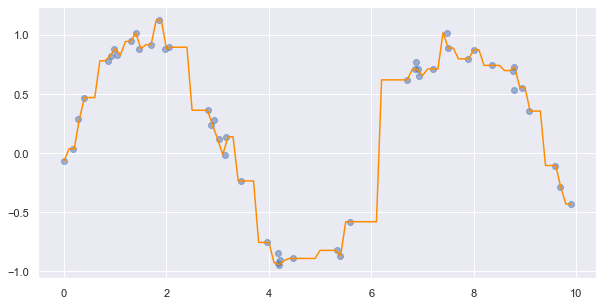

In [5]:
# generate predicitions
X_fit = np.arange(0, 10, .1)
y_fit = model.predict(X_fit[:, np.newaxis])

# plot raw data
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.5)

# plot fitted values
plt.plot(X_fit, y_fit, c='darkorange');

And this is the huge tree that creates this line:

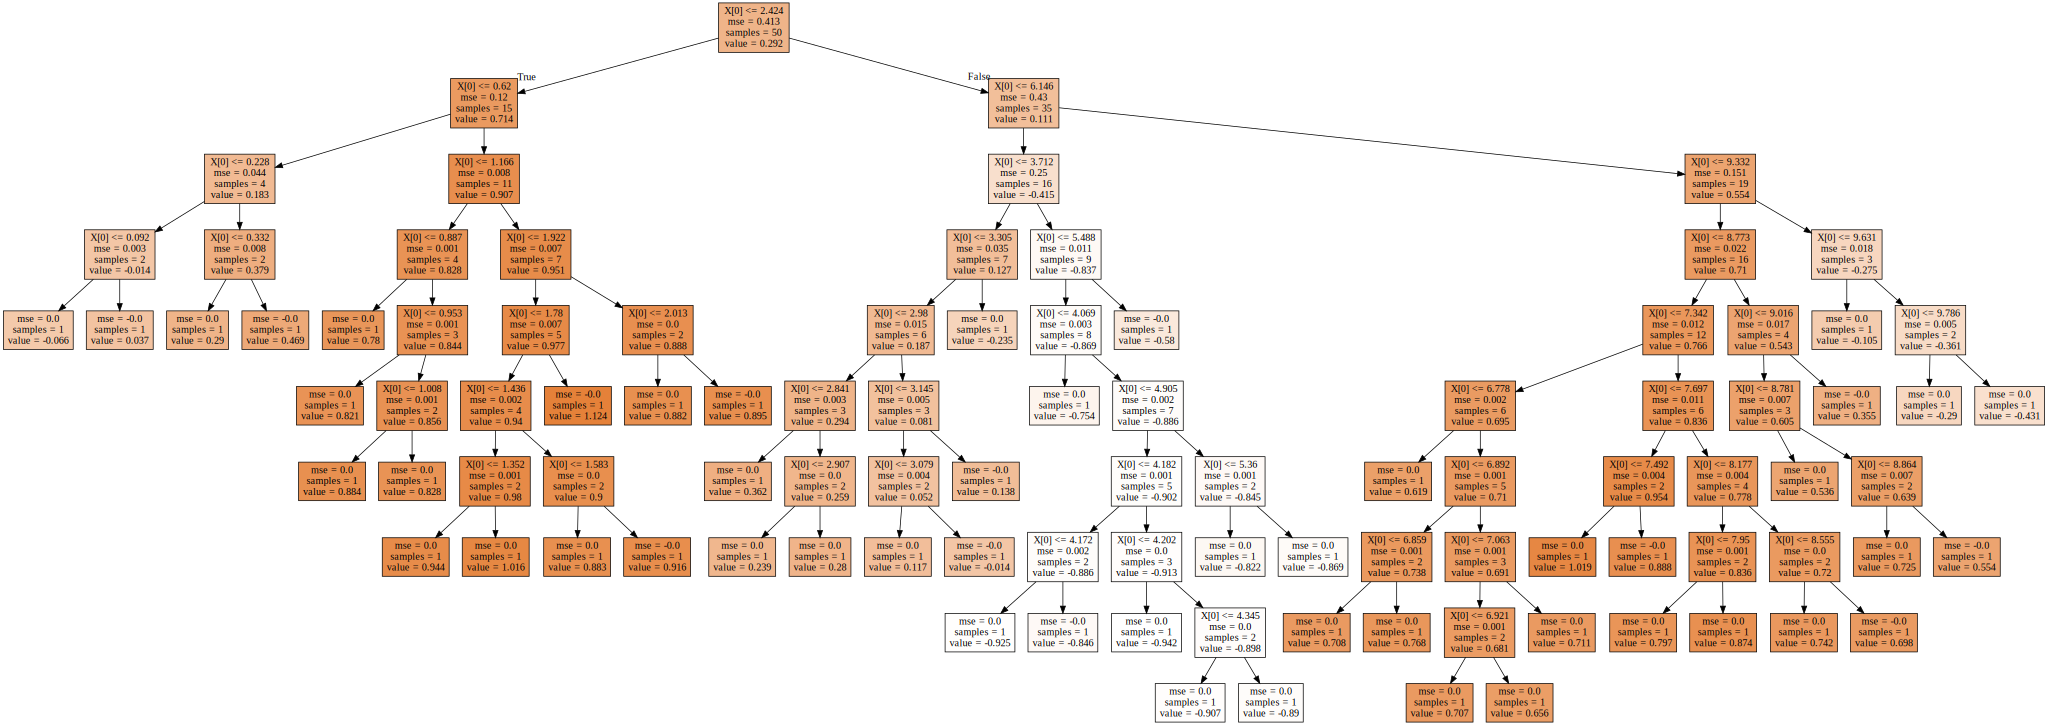

In [6]:
import graphviz

dot_data = tree.export_graphviz(model,
                                filled=True) 
graph = graphviz.Source(dot_data) 
graph

As we might expect, the $R^2$ goes down in 5-CV:

In [7]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X[:, np.newaxis], y, cv=5)
scores.mean()

0.9183145317460166

### Hyperparameters

#### Depth, Splits, and Leaves

Let's try different depths:

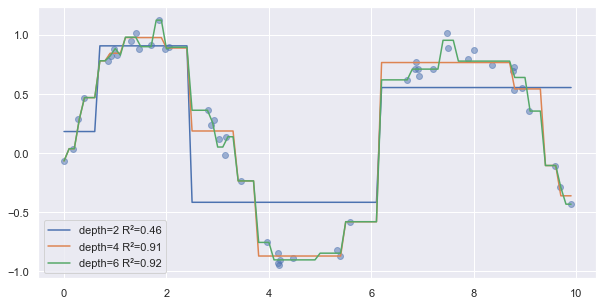

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.5)

for depth in [2, 4, 6]:
    # train
    model = tree.DecisionTreeRegressor(max_depth=depth)
    model.fit(X[:, np.newaxis], y)
    
    # 5-CV
    scores = cross_val_score(model, X[:, np.newaxis], y, cv=5)
    
    # plot
    y_fit = model.predict(X_fit[:, np.newaxis])
    plt.plot(X_fit, y_fit,
             label=f'depth={depth} R²={scores.mean():.2f}')

plt.legend();

#### Pruning

Let's also try different pruning $\alpha$'s:

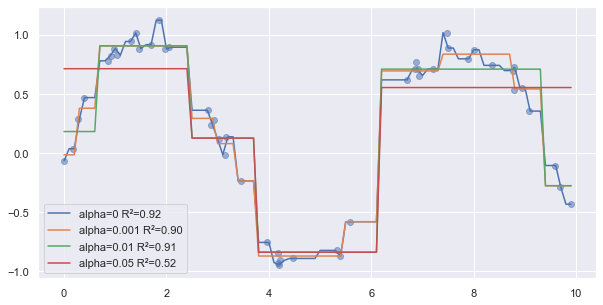

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.5)

for a in [0, .001, .01, .05]:
    # train
    model = tree.DecisionTreeRegressor(ccp_alpha=a)
    model.fit(X[:, np.newaxis], y)
    
    # 5-CV
    scores = cross_val_score(model, X[:, np.newaxis], y, cv=5)
    
    # plot
    y_fit = model.predict(X_fit[:, np.newaxis])
    plt.plot(X_fit, y_fit,
             label=f'alpha={a} R²={scores.mean():.2f}')

plt.legend();

As you can see, in this very small data set, out-of-sample issues aren't too much of a concern.

© 2023 Philipp Cornelius